
# 실습

titanic 데이터를 seaborn에서 로딩

```
- age 컬럼에 대한 histogram 그리기
- age 컬럼에 대한 survivied를 histo gram으로 그리기. 하나의 나이에 대해 2개의 bar가 있도록
- age 컬럼에 대한 생존율을 비교하도록 multiple 옵션을 fill로 해서 그리기
- age 컬럼을 x로 fare 컬럼을 y로 해서 scatter 그림 그리기
- 위의 4개의 그림을 각각 파일로 저장

- 파일로 저장한 4개의 그림을 읽어서 다음과 같이 배치하여 1장으로 보이기
   1   2
   3   4
```

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import cv2

titanic = sns.load_dataset("titanic")

seaborn 셋팅

In [2]:
sns.set(context = 'notebook',
        style = 'darkgrid',
        palette = 'deep',
        font_scale=1,
        color_codes=True)

In [3]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


age 컬럼에 대한 histogram 그리기

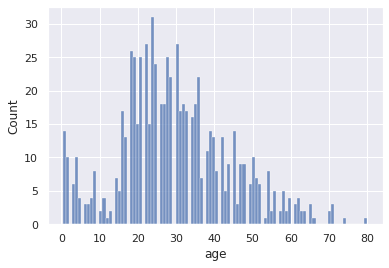

In [4]:
sns.histplot(titanic.age, bins = 100)
plt.savefig("plot1.jpg")

- age 컬럼에 대한 survivied를 histo gram으로 그리기. 하나의 나이에 대해 2개의 bar가 있도록

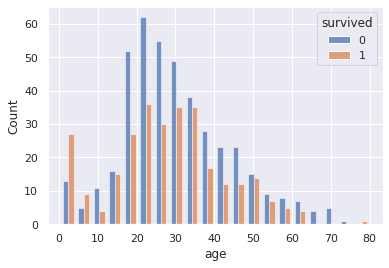

In [5]:
sns.histplot(data=titanic, x="age", hue="survived", multiple= "dodge", shrink=0.7)
plt.savefig("plot2.jpg")

- age 컬럼에 대한 생존율을 비교하도록 multiple 옵션을 fill로 해서 그리기

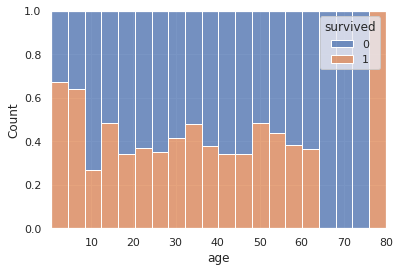

In [6]:
sns.histplot(data=titanic, x="age", hue="survived", multiple= "fill")
plt.savefig("plot3.jpg")

- age 컬럼을 x로 fare 컬럼을 y로 해서 scatter 그림 그리기

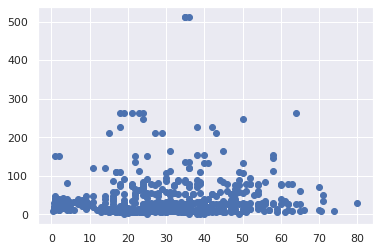

In [7]:
plt.scatter(data=titanic, x="age", y="fare")
plt.savefig("plot4.jpg")

- 위의 4개의 그림을 각각 파일로 저장


```
- 파일로 저장한 4개의 그림을 읽어서 다음과 같이 배치하여 1장으로 보이기
   1   2
   3   4

```

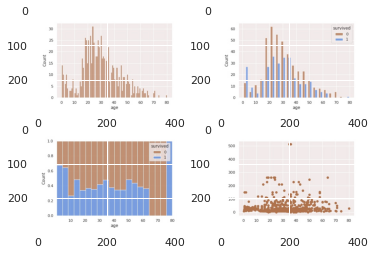

In [8]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
plot1 = cv2.imread("plot1.jpg")
ax1.imshow(plot1)

ax2 = fig.add_subplot(2, 2, 2)
plot2 = cv2.imread("plot2.jpg")
ax2.imshow(plot2)

ax3 = fig.add_subplot(2, 2, 3)
plot3 = cv2.imread("plot3.jpg")
ax3.imshow(plot3)

ax4 = fig.add_subplot(2, 2, 4)
plot4 = cv2.imread("plot4.jpg")
ax4.imshow(plot4)


plt.show()

# 이상한 IRIS 데이터 전처리
- 머신러닝을 위한 전처리

# 이상치와 결측치 처리
- 이상치 : 삭제
- 결측치 : class, color는 위값으로 채움, 
나머지는 평균으로 대치

- 데이터를 최대한 삭제하지 않는 방법이 좋음

In [9]:
!wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/library/flawed_iris.csv

--2021-11-26 08:36:20--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/library/flawed_iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2782 (2.7K) [text/plain]
Saving to: ‘flawed_iris.csv.3’

flawed_iris.csv.3   100%[===================>]   2.72K  --.-KB/s    in 0s      

2021-11-26 08:36:21 (28.9 MB/s) - ‘flawed_iris.csv.3’ saved [2782/2782]



In [10]:
df = pd.read_csv("flawed_iris.csv")
df

,septal_length,septal_width,petal_length,petal_width,color,class
0,6.4,2.8,5.6,2.2,light,2.0
1,5.0,2.3,3.3,1.0,medium,1.0
2,4.9,2.5,4.5,1.7,medium,2.0
3,4.9,3.1,1.5,0.1,dark,0.0
4,5.7,3.8,1.7,0.3,dark,0.0
...,...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,light,1.0
116,5.7,3,NaN,1.2,light,1.0
117,4.4,2.9,1.4,0.2,light,0.0
118,4.8,3,1.4,0.1,dark,0.0


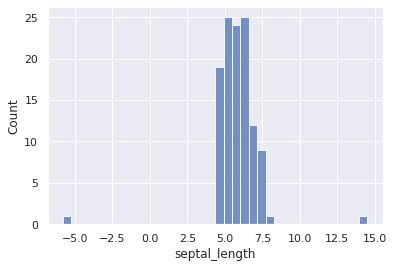

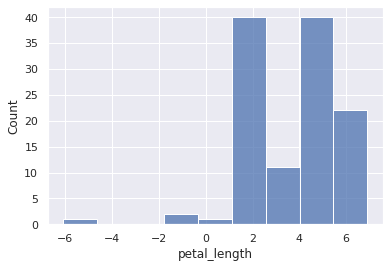

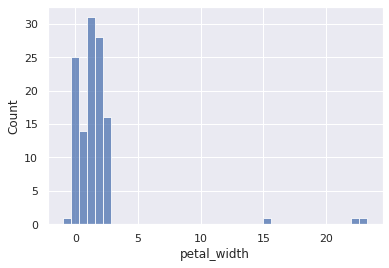

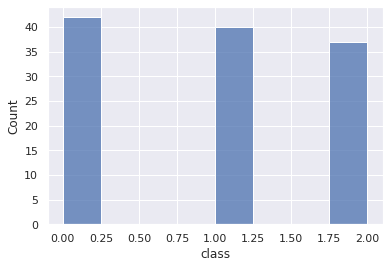

In [11]:
sns.histplot(df.septal_length)
plt.show()
sns.histplot(df.petal_length)
plt.show()
sns.histplot(df.petal_width)
plt.show()
sns.histplot(df["class"])
plt.show()

이상치 처리 ver.1

In [12]:
df["sep_len"] = df.loc[ ((df["septal_length"] >= 0 ) & (df["septal_length"] <= 12.5)), "septal_length"]
df["pe_len"] = df.loc[ (df["petal_length"] >= -2 ), "petal_length"]
df["pe_wid"] = df.loc[ (df["petal_width"] <= 5 ), "petal_width"]

In [13]:
df

,septal_length,septal_width,petal_length,petal_width,color,class,sep_len,pe_len,pe_wid
0,6.4,2.8,5.6,2.2,light,2.0,6.4,5.6,2.2
1,5.0,2.3,3.3,1.0,medium,1.0,5.0,3.3,1.0
2,4.9,2.5,4.5,1.7,medium,2.0,4.9,4.5,1.7
3,4.9,3.1,1.5,0.1,dark,0.0,4.9,1.5,0.1
4,5.7,3.8,1.7,0.3,dark,0.0,5.7,1.7,0.3
...,...,...,...,...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,light,1.0,5.5,4.4,1.2
116,5.7,3,NaN,1.2,light,1.0,5.7,NaN,1.2
117,4.4,2.9,1.4,0.2,light,0.0,4.4,1.4,0.2
118,4.8,3,1.4,0.1,dark,0.0,4.8,1.4,0.1


In [14]:
df = df.iloc[:,4:]
df

,color,class,sep_len,pe_len,pe_wid
0,light,2.0,6.4,5.6,2.2
1,medium,1.0,5.0,3.3,1.0
2,medium,2.0,4.9,4.5,1.7
3,dark,0.0,4.9,1.5,0.1
4,dark,0.0,5.7,1.7,0.3
...,...,...,...,...,...
115,light,1.0,5.5,4.4,1.2
116,light,1.0,5.7,NaN,1.2
117,light,0.0,4.4,1.4,0.2
118,dark,0.0,4.8,1.4,0.1


결측치 처리 ver.1

In [15]:
# 결측치 확인
df.isnull().sum()

color      3
class      1
sep_len    5
pe_len     4
pe_wid     5
dtype: int64

In [16]:
# class와 color의 결측치 제거, 나머지 평균값으로 대치
df.drop(df.loc[df["class"].isnull()].index, inplace=True)
df.isnull().sum()

color      2
class      0
sep_len    5
pe_len     4
pe_wid     5
dtype: int64

In [17]:
df.drop(df.loc[df["color"].isnull()].index, inplace=True)
df.isnull().sum()

color      0
class      0
sep_len    5
pe_len     4
pe_wid     5
dtype: int64

In [18]:
df.loc[df["sep_len"].isnull(), "sep_len"] = df.sep_len.mean()
df.isnull().sum()

color      0
class      0
sep_len    0
pe_len     4
pe_wid     5
dtype: int64

In [19]:
df.loc[df["pe_len"].isnull(), "pe_len"] = df.pe_len.mean()
df.isnull().sum()

color      0
class      0
sep_len    0
pe_len     0
pe_wid     5
dtype: int64

In [20]:
df.loc[df["pe_wid"].isnull(), "pe_wid"] = df.pe_wid.mean()
df.isnull().sum()

color      0
class      0
sep_len    0
pe_len     0
pe_wid     0
dtype: int64

In [21]:
df

,color,class,sep_len,pe_len,pe_wid
0,light,2.0,6.4,5.600000,2.2
1,medium,1.0,5.0,3.300000,1.0
2,medium,2.0,4.9,4.500000,1.7
3,dark,0.0,4.9,1.500000,0.1
4,dark,0.0,5.7,1.700000,0.3
...,...,...,...,...,...
115,light,1.0,5.5,4.400000,1.2
116,light,1.0,5.7,3.637168,1.2
117,light,0.0,4.4,1.400000,0.2
118,dark,0.0,4.8,1.400000,0.1


# 이상치와 결측치 처리 ver.2
- 이상치 : 가장 가까운 값으로 대치
- 결측치 : class, color는 위값으로 채움, 
나머지는 평균으로 대치
- 잘못 입력한 데이터 처리

In [22]:
data = pd.read_csv("flawed_iris.csv")
data

,septal_length,septal_width,petal_length,petal_width,color,class
0,6.4,2.8,5.6,2.2,light,2.0
1,5.0,2.3,3.3,1.0,medium,1.0
2,4.9,2.5,4.5,1.7,medium,2.0
3,4.9,3.1,1.5,0.1,dark,0.0
4,5.7,3.8,1.7,0.3,dark,0.0
...,...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,light,1.0
116,5.7,3,NaN,1.2,light,1.0
117,4.4,2.9,1.4,0.2,light,0.0
118,4.8,3,1.4,0.1,dark,0.0


이상치 처리 ver.2

In [23]:
data["sep_len"] = data.loc[ ((data["septal_length"] >= 0 ) & (data["septal_length"] <= 12.5)), "septal_length"]

In [24]:
data.loc[data.septal_length <= 0, "septal_length"] = data.sep_len.min()
data.loc[data.septal_length >= 12.5, "septal_length"] = data.sep_len.max()

In [25]:
data["pe_len"] = data.loc[ (data["petal_length"] >= -2 ), "petal_length"]

In [26]:
data.loc[data.petal_length < -2, "petal_length"] = data.pe_len.min()

In [27]:
data["pe_wid"] = data.loc[ (data["petal_width"] <= 5 ), "petal_width"]
data.loc[(data.petal_width > 5), "petal_width"]

70     22.2
81     15.4
102    23.3
Name: petal_width, dtype: float64

In [28]:
data

,septal_length,septal_width,petal_length,petal_width,color,class,sep_len,pe_len,pe_wid
0,6.4,2.8,5.6,2.2,light,2.0,6.4,5.6,2.2
1,5.0,2.3,3.3,1.0,medium,1.0,5.0,3.3,1.0
2,4.9,2.5,4.5,1.7,medium,2.0,4.9,4.5,1.7
3,4.9,3.1,1.5,0.1,dark,0.0,4.9,1.5,0.1
4,5.7,3.8,1.7,0.3,dark,0.0,5.7,1.7,0.3
...,...,...,...,...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,light,1.0,5.5,4.4,1.2
116,5.7,3,NaN,1.2,light,1.0,5.7,NaN,1.2
117,4.4,2.9,1.4,0.2,light,0.0,4.4,1.4,0.2
118,4.8,3,1.4,0.1,dark,0.0,4.8,1.4,0.1


결측치 처리 ver.2

In [29]:
data = data.iloc[:,:6]
data

,septal_length,septal_width,petal_length,petal_width,color,class
0,6.4,2.8,5.6,2.2,light,2.0
1,5.0,2.3,3.3,1.0,medium,1.0
2,4.9,2.5,4.5,1.7,medium,2.0
3,4.9,3.1,1.5,0.1,dark,0.0
4,5.7,3.8,1.7,0.3,dark,0.0
...,...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,light,1.0
116,5.7,3,NaN,1.2,light,1.0
117,4.4,2.9,1.4,0.2,light,0.0
118,4.8,3,1.4,0.1,dark,0.0


In [30]:
data.isnull().sum()

septal_length    3
septal_width     2
petal_length     3
petal_width      2
color            3
class            1
dtype: int64

In [31]:
data.color.fillna(method="ffill", inplace = True)
data.isnull().sum()

septal_length    3
septal_width     2
petal_length     3
petal_width      2
color            0
class            1
dtype: int64

In [32]:
data["class"].fillna(method="ffill", inplace = True)
data.isnull().sum()

septal_length    3
septal_width     2
petal_length     3
petal_width      2
color            0
class            0
dtype: int64

In [33]:
# 잘못 들어간 값
# 오류 해결
data.septal_width.value_counts()

3       18
3.2     13
2.8     11
3.1     10
3.4      8
2.7      7
2.9      7
3.8      6
3.5      5
2.6      4
3.3      4
2.5      4
2.3      3
3.7      3
3.6      3
3.9      2
2.4      2
2.2      2
15       1
2..3     1
4.4      1
4        1
-3       1
16       1
Name: septal_width, dtype: int64

In [34]:
# 잘못된 데이터 수정
data.loc[ data.septal_width == "2..3"] = "2.3"

In [35]:
data.septal_width.value_counts()

3      18
3.2    13
2.8    11
3.1    10
3.4     8
2.9     7
2.7     7
3.8     6
3.5     5
3.3     4
2.3     4
2.6     4
2.5     4
3.7     3
3.6     3
2.2     2
3.9     2
2.4     2
15      1
4.4     1
4       1
-3      1
16      1
Name: septal_width, dtype: int64

In [36]:
# 데이터 타입 지정
data.septal_length = data.septal_length.astype(float)
data.septal_width = data.septal_width.astype(float)
data.petal_length = data.petal_length.astype(float)
data.petal_width = data.petal_width.astype(float)
data.color = data.color.astype(str)
data["class"] = data["class"].astype(str)

In [37]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  117 non-null    float64
 1   septal_width   118 non-null    float64
 2   petal_length   117 non-null    float64
 3   petal_width    118 non-null    float64
 4   color          120 non-null    object 
 5   class          120 non-null    object 
dtypes: float64(4), object(2)
memory usage: 5.8+ KB
None


In [38]:
data.isnull().sum()

septal_length    3
septal_width     2
petal_length     3
petal_width      2
color            0
class            0
dtype: int64

In [41]:
# 나머지 컬럼 평균값으로 정리
data.loc[data["septal_length"].isnull(), "septal_length"] = data.septal_length.mean()
data.loc[data["septal_width"].isnull(), "septal_width"] = data.septal_width.mean()
data.loc[data["petal_length"].isnull(), "petal_length"] = data.petal_length.mean()
data.loc[data["petal_width"].isnull(), "petal_width"] = data.petal_width.mean()
df.isnull().sum()

color      0
class      0
sep_len    0
pe_len     0
pe_wid     0
dtype: int64

# 정규화

# 전처리된 IRIS 데이터 트레이닝